In [ ]:
# 1. Do the EDA on the given dataset: Lung cancer, and extract some useful information from this.
# Dataset Description:
# Lung cancer is one of the most prevalent and deadly forms of cancer worldwide, presenting significant
# challenges in early detection and effective treatment. To aid in the global effort to understand and combat this
# disease, we are excited to introduce our comprehensive Lung Cancer Dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import zipfile

# Specify the zip file path
zip_file_path = "/content/lungs_cancer.zip"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the files in the zip file
    file_list = zip_ref.namelist()

    # Assuming you want to read the CSV file, find it
    csv_file = [f for f in file_list if f.endswith('.csv')][0]

    # Extract the CSV file to a temporary file
    with zip_ref.open(csv_file) as file, open('temp.csv', 'wb') as temp_file:
        temp_file.write(file.read())

# Read the extracted CSV file into a pandas DataFrame
df = pd.read_csv("temp.csv")

# Optionally delete the temporary file
!rm temp.csv

In [2]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
df.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
df.tail(3)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES
2999,M,40,1,2,2,1,1,1,2,2,2,1,1,1,1,YES


In [7]:
df.describe() # statistical information about numerical columns

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df.sample()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
304,F,52,2,1,1,1,2,2,2,1,1,1,2,1,2,YES


In [9]:
df.shape

(3000, 16)

In [10]:
df.describe(include ="all") # categorical data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1518
mean,NaN,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667,NaN
std,NaN,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082,NaN
min,NaN,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,NaN
75%,NaN,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [11]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [13]:
df.duplicated().sum()

2

In [14]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [15]:
df.drop_duplicates().shape

(2998, 16)

In [16]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [17]:
df["LUNG_CANCER"].dtype

dtype('O')

In [18]:
df["YELLOW_FINGERS"].dtype

dtype('int64')

In [19]:
df["ALCOHOL_CONSUMING"].dtype

dtype('int64')

In [20]:
type(df.LUNG_CANCER )

pandas.core.series.Series

In [21]:
df.LUNG_CANCER.str.isnumeric()



0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: LUNG_CANCER, Length: 3000, dtype: bool

In [22]:
"1".isnumeric()

True

In [23]:
"a".isnumeric()

False

In [24]:
df[df.LUNG_CANCER.str.isnumeric()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER


In [25]:
df[~df.LUNG_CANCER.str.isnumeric()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [26]:
df.reset_index(drop = True,inplace=True)

In [27]:
df["ALCOHOL_CONSUMING"].unique()

array([2, 1])

In [28]:
df["CHEST_PAIN"].unique()

array([1, 2])

In [29]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [30]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

In [31]:
categorical_feature

['GENDER', 'LUNG_CANCER']

In [32]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O"]

In [33]:
numerical_feature


['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC_DISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING_DIFFICULTY',
 'CHEST_PAIN']

In [34]:
# categorical data >> frequency_plot ,bar_chart , pie_chart
# numerical data >> histogram,distplot,boxplot,linechart,pairplot,scatterplot

In [35]:
df["GENDER"].value_counts()

GENDER
M    1514
F    1486
Name: count, dtype: int64

In [36]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    1518
NO     1482
Name: count, dtype: int64

In [37]:
df["GENDER"].value_counts(normalize=True)*100


GENDER
M    50.466667
F    49.533333
Name: proportion, dtype: float64

In [38]:
df["LUNG_CANCER"].value_counts(normalize = True)*100

LUNG_CANCER
YES    50.6
NO     49.4
Name: proportion, dtype: float64

In [39]:
for col in categorical_feature:
  print(f"{col} : {df[col].value_counts(normalize = True)*100}")

GENDER : GENDER
M    50.466667
F    49.533333
Name: proportion, dtype: float64
LUNG_CANCER : LUNG_CANCER
YES    50.6
NO     49.4
Name: proportion, dtype: float64


categorical_feature_ analysis

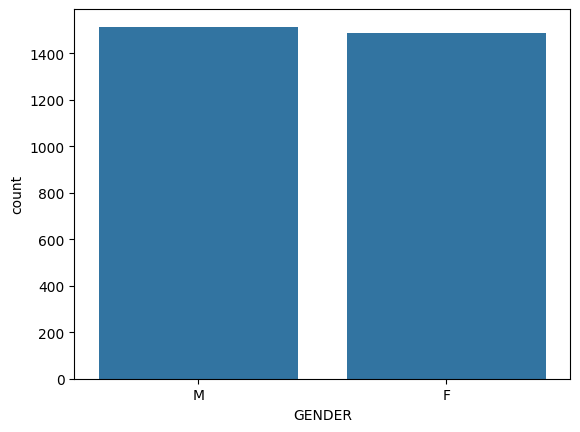

In [40]:
sns.countplot(x=df["GENDER"])
plt.show()

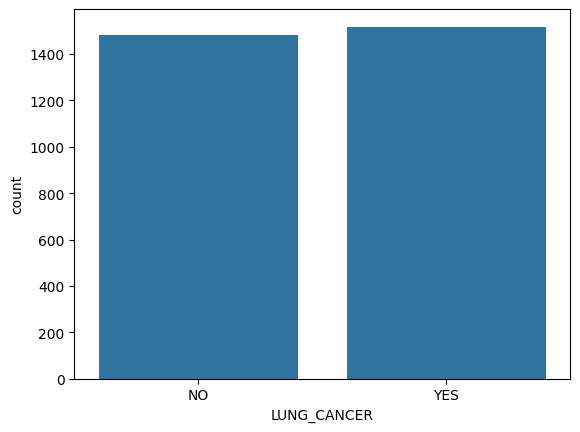

In [41]:
sns.countplot(x=df["LUNG_CANCER"])
plt.show()

numerical_feature

In [42]:
numerical_feature

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC_DISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING_DIFFICULTY',
 'CHEST_PAIN']

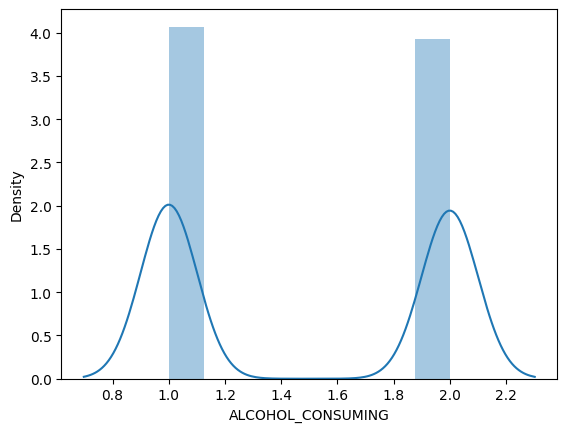

In [43]:
sns.distplot(df["ALCOHOL_CONSUMING"],kde=True)
plt.show()

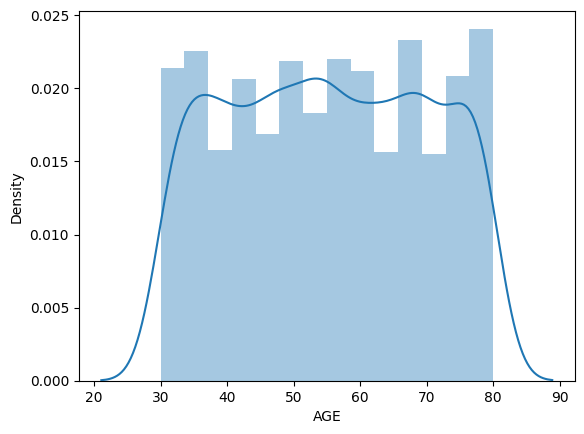

In [44]:
sns.distplot(df["AGE"])
plt.show()

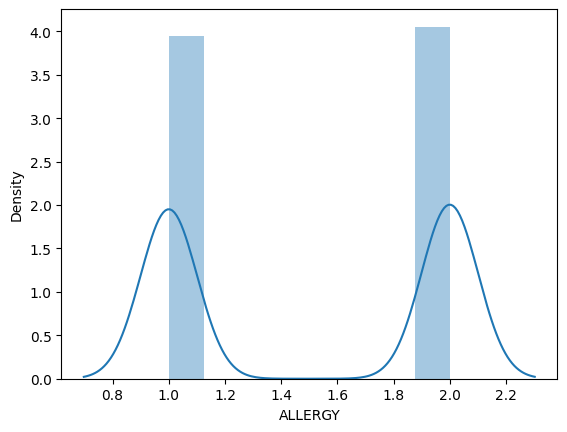

In [45]:
sns.distplot(df["ALLERGY"],kde=True)
plt.show()

<Axes: xlabel='COUGHING', ylabel='Density'>

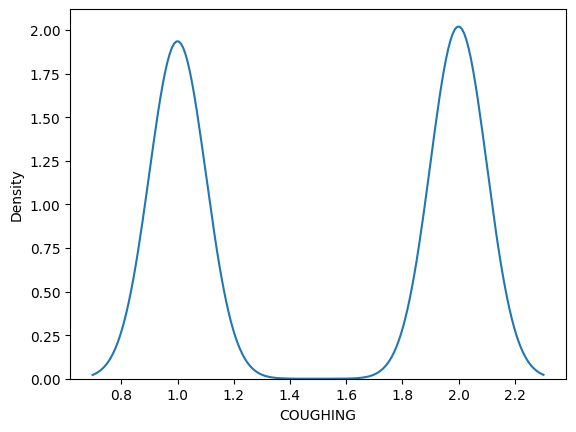

In [46]:
sns.kdeplot(df["COUGHING"])

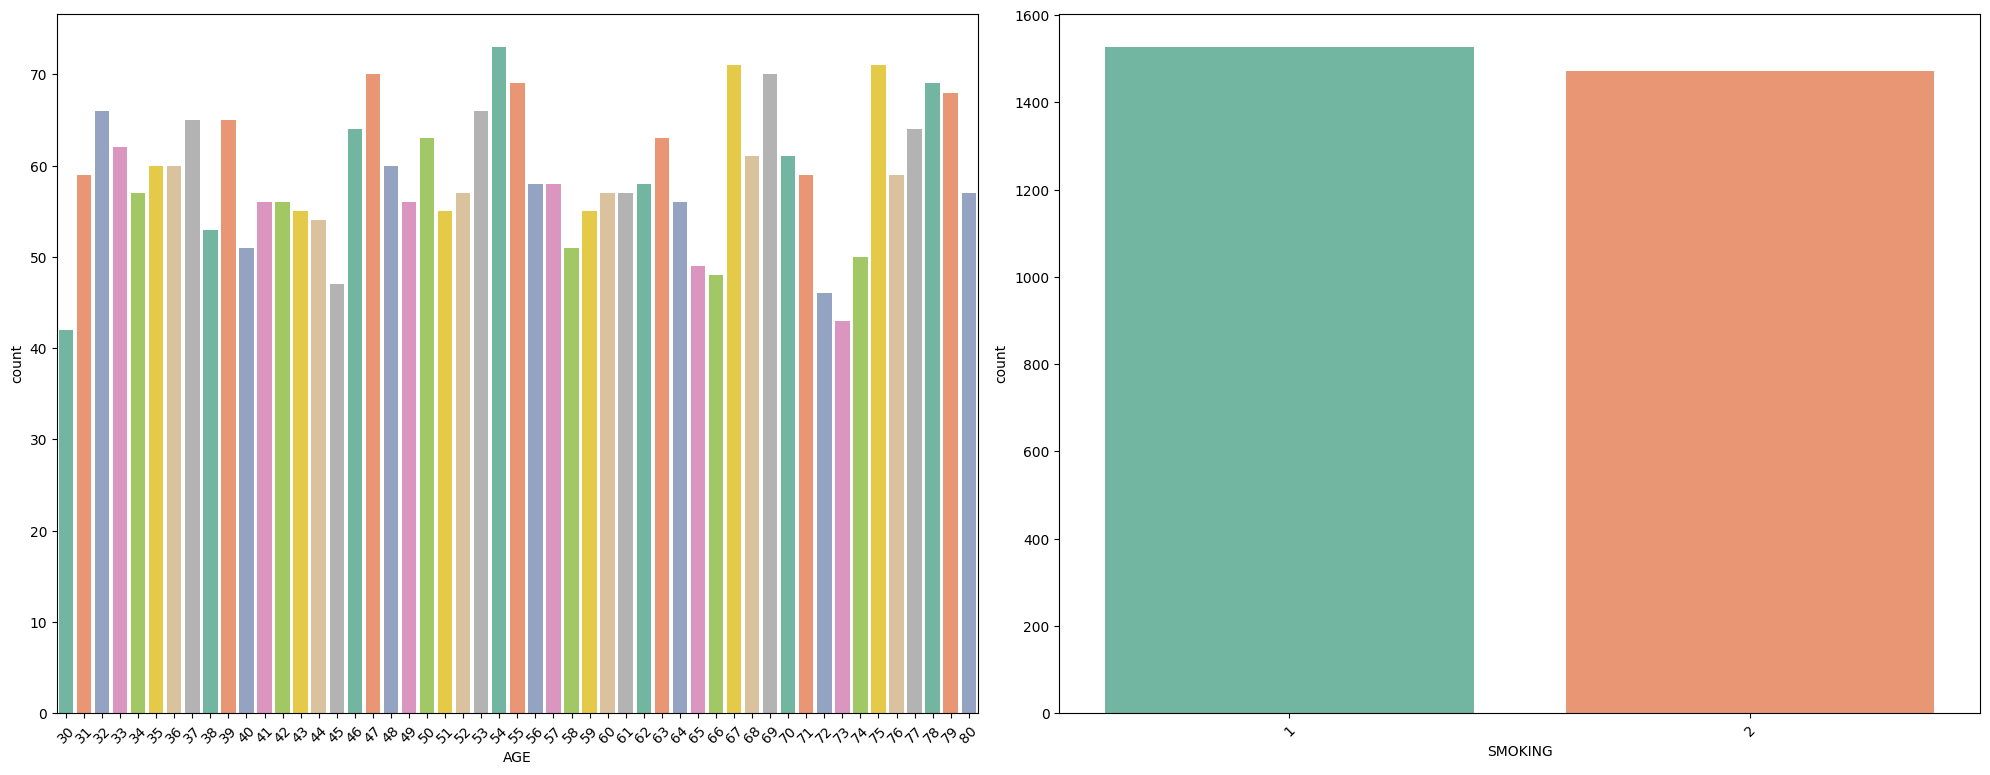

In [47]:
plt.figure(figsize=(20,15))
category = ["AGE","SMOKING"]

for i in range(0,len(category)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[category[i]],palette="Set2")
  plt.xlabel(category[i])
  plt.xticks(rotation=45)
  plt.tight_layout()

In [48]:
# which category is the most popular category in the app?
# pie_chart

<Axes: ylabel='count'>

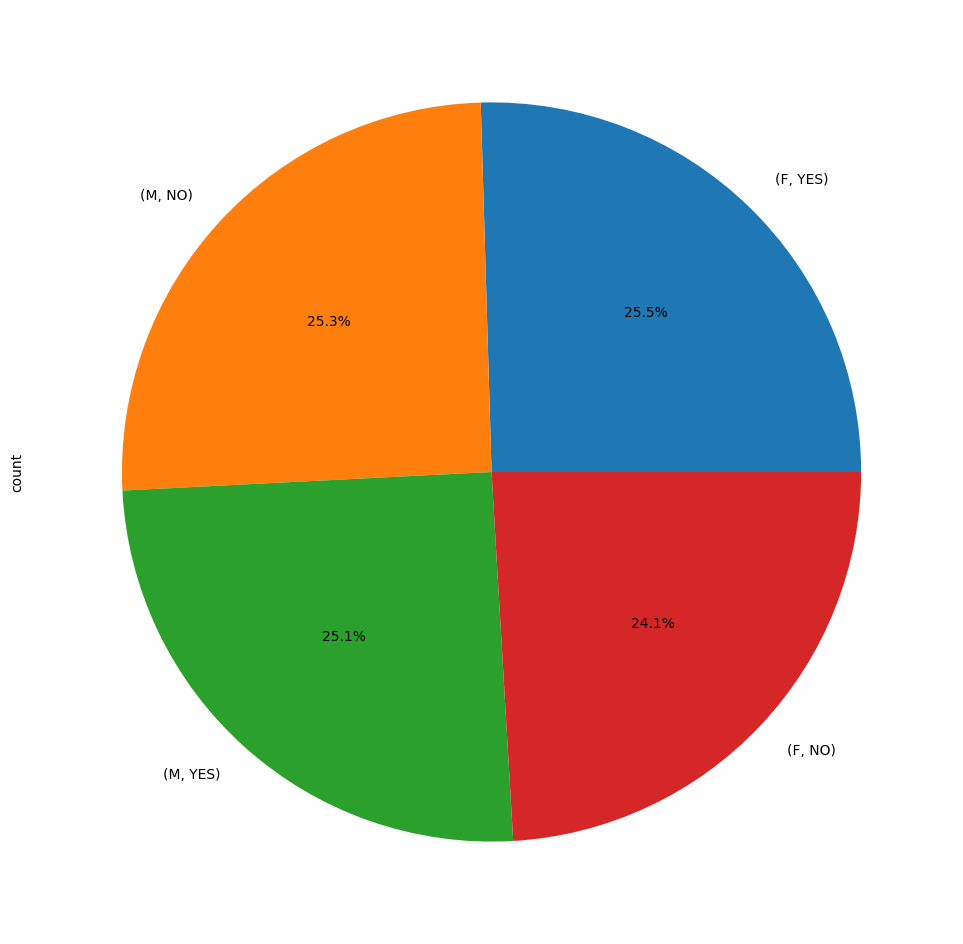

In [49]:
df[['GENDER',"LUNG_CANCER"]].value_counts().plot.pie(figsize=(12,12),autopct='%1.1f%%')

<Axes: ylabel='AGE'>

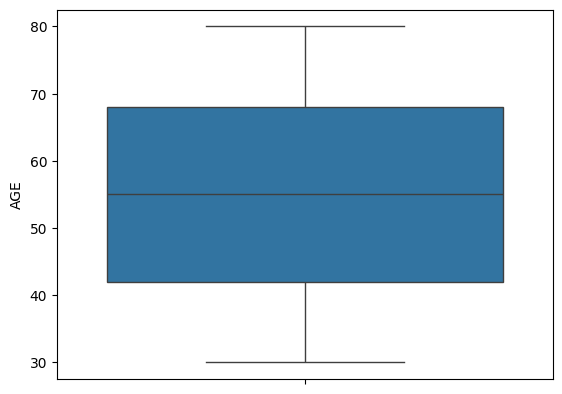

In [50]:
sns.boxplot(df["AGE"])

<Axes: xlabel='AGE', ylabel='ALCOHOL_CONSUMING'>

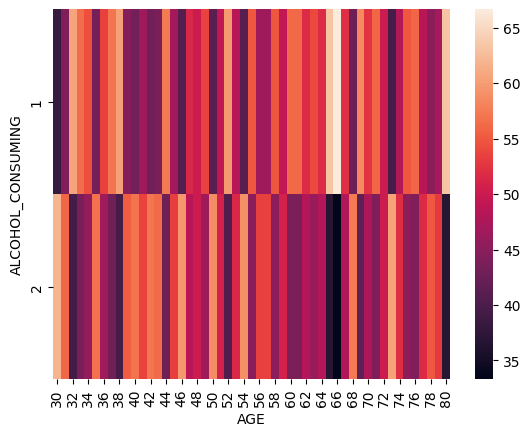

In [51]:
sns.heatmap(pd.crosstab(df['ALCOHOL_CONSUMING'],df['AGE'],normalize='columns')*100)

<Axes: xlabel='AGE'>

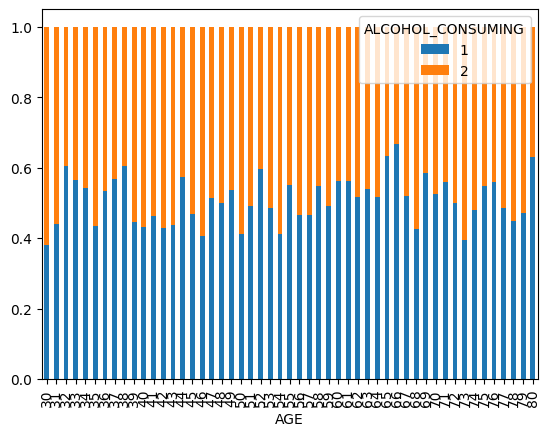

In [52]:
pd.crosstab(df['AGE'],df['ALCOHOL_CONSUMING'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='YELLOW_FINGERS'>

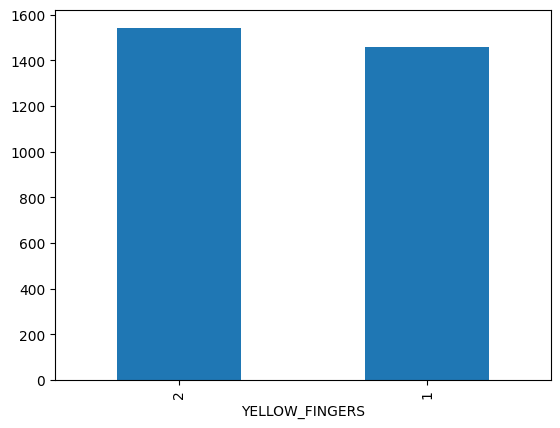

In [54]:
df.YELLOW_FINGERS.value_counts().plot(kind="bar")

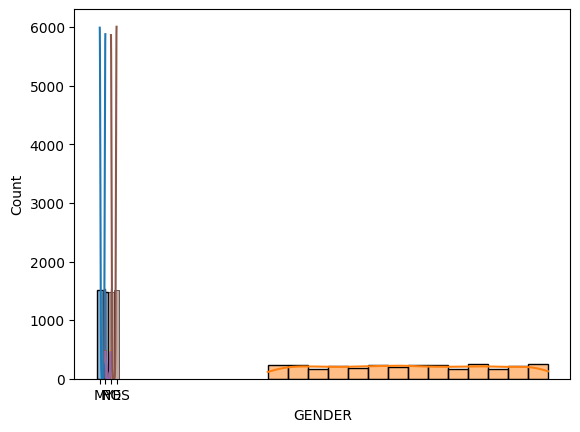

In [ ]:
for i in df.columns:
  sns.histplot(df[i],kde=True)

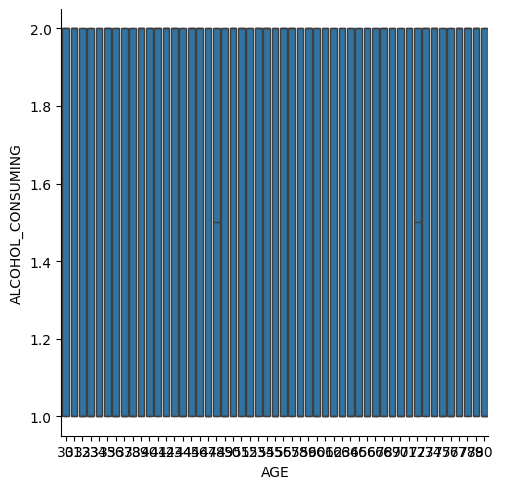

In [55]:
sns.catplot(x='AGE',y="ALCOHOL_CONSUMING",data=df,kind="box")

<Axes: xlabel='AGE', ylabel='Count'>

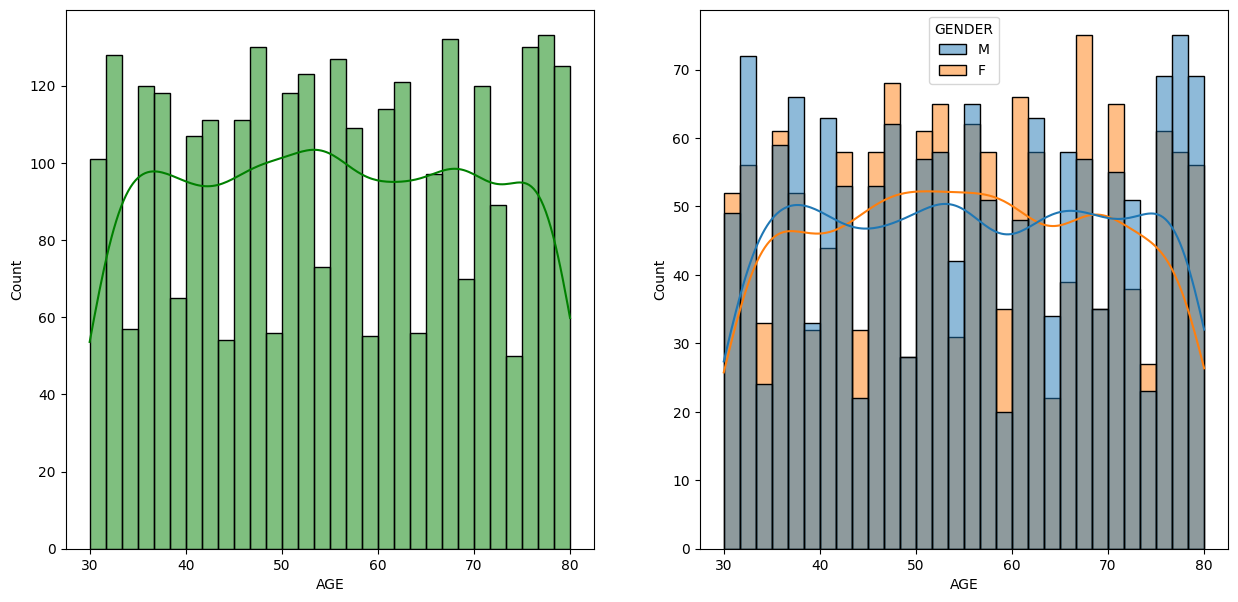

In [56]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='AGE',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='AGE',bins=30,kde=True,hue='GENDER')

<Axes: xlabel='SMOKING', ylabel='count'>

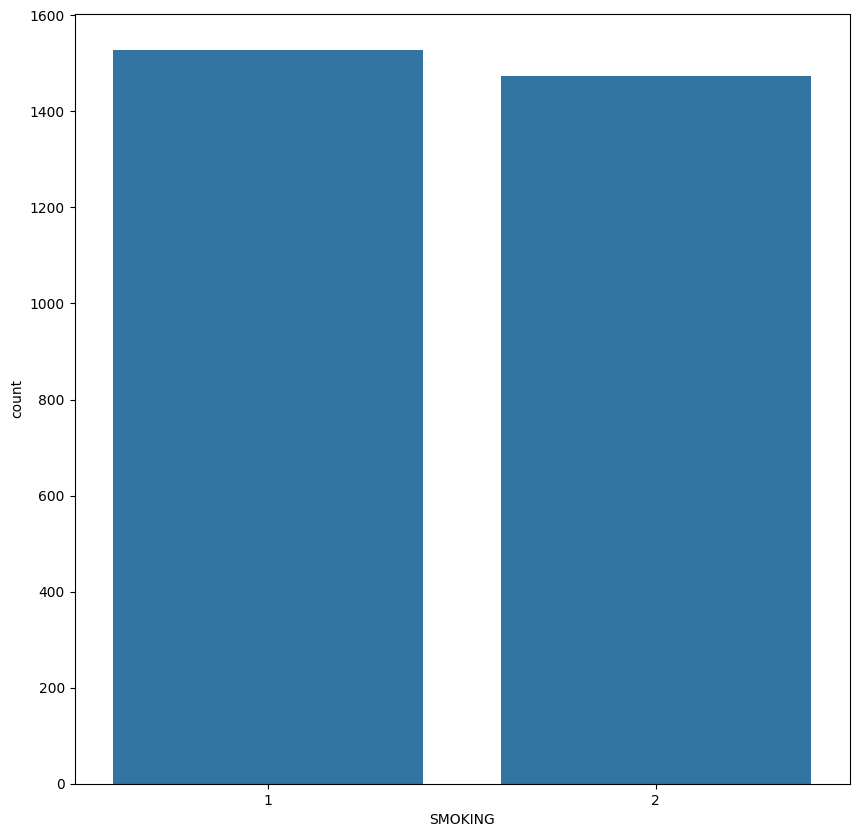

In [57]:
# Smokers count
plt.figure(figsize=(10,10))
sns.countplot(x="SMOKING", data=df)

<Axes: ylabel='count'>

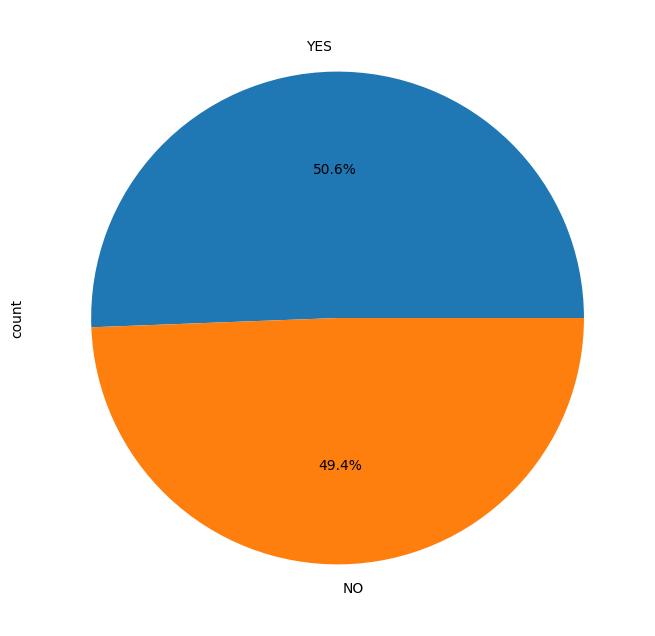

In [58]:
# Percentage of people with lung cancer in the dataset

# 100. * cancer_data.LUNG_CANCER.value_counts() / len(cancer_data.LUNG_CANCER)
df.LUNG_CANCER.value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

<Axes: xlabel='AGE', ylabel='Count'>

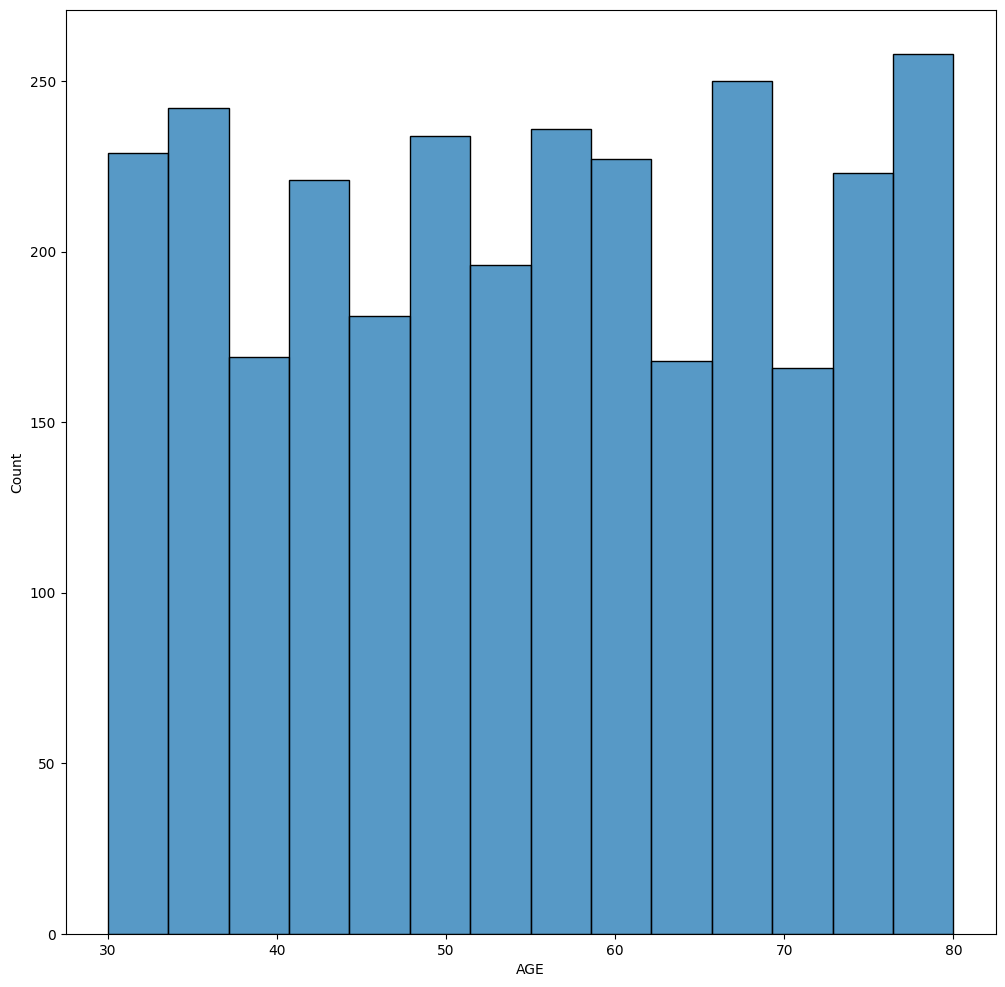

In [59]:
plt.figure(figsize = (12,12))
sns.histplot(df['AGE'])

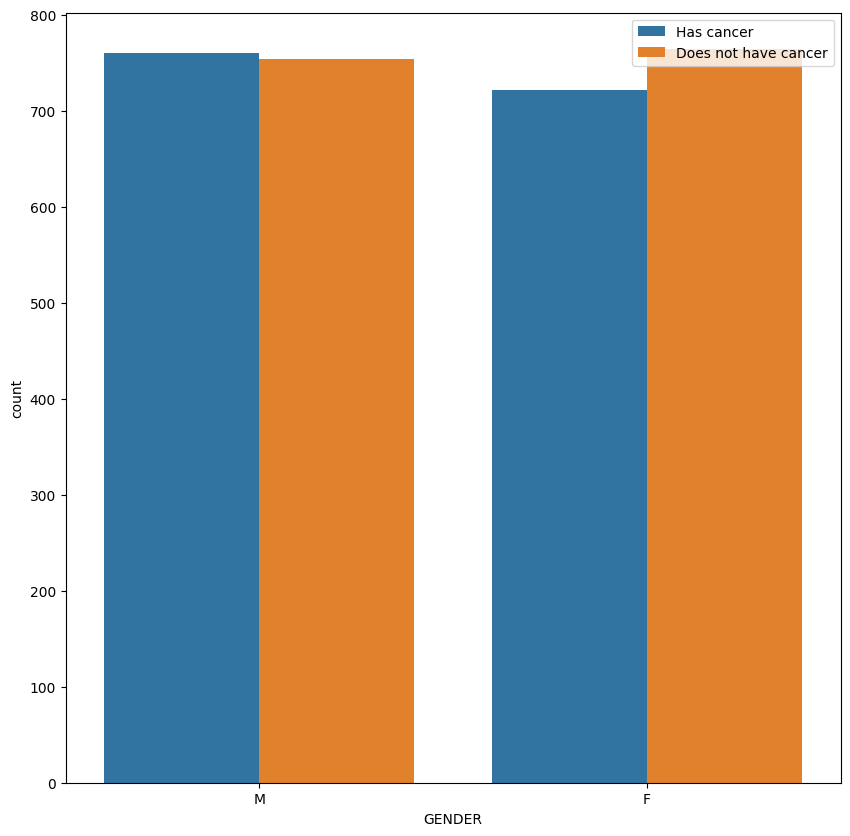

In [60]:
# Lung Cancer across Genders
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='GENDER',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])